# 1. Library import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
from sklearn.metrics import *

plt.style.use('seaborn')
sns.set(font_scale=1.5)

# 2. DataSet Load

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# 기술통계 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 상관관계 확인
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


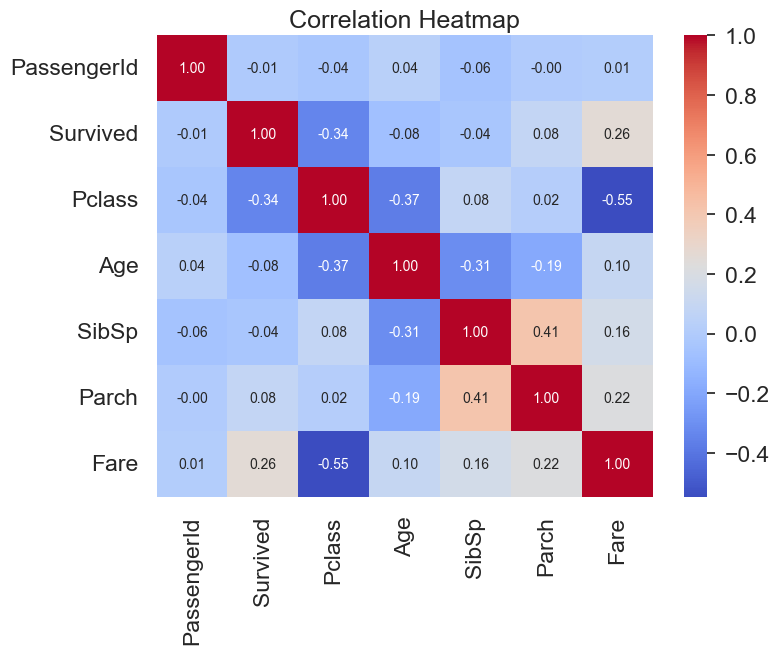

In [6]:
# 상관관계 확인_heatmap
corr_matrix = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':10})
plt.title('Correlation Heatmap')
plt.show()

# 3. EDA

## NaN

In [7]:
# NaN 개수
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# NaN 비율
data.isnull().sum() / data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## Pclass

In [9]:
# Pclass별 생존자 수
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [10]:
# Pclass별 생존율
data.groupby('Pclass')['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


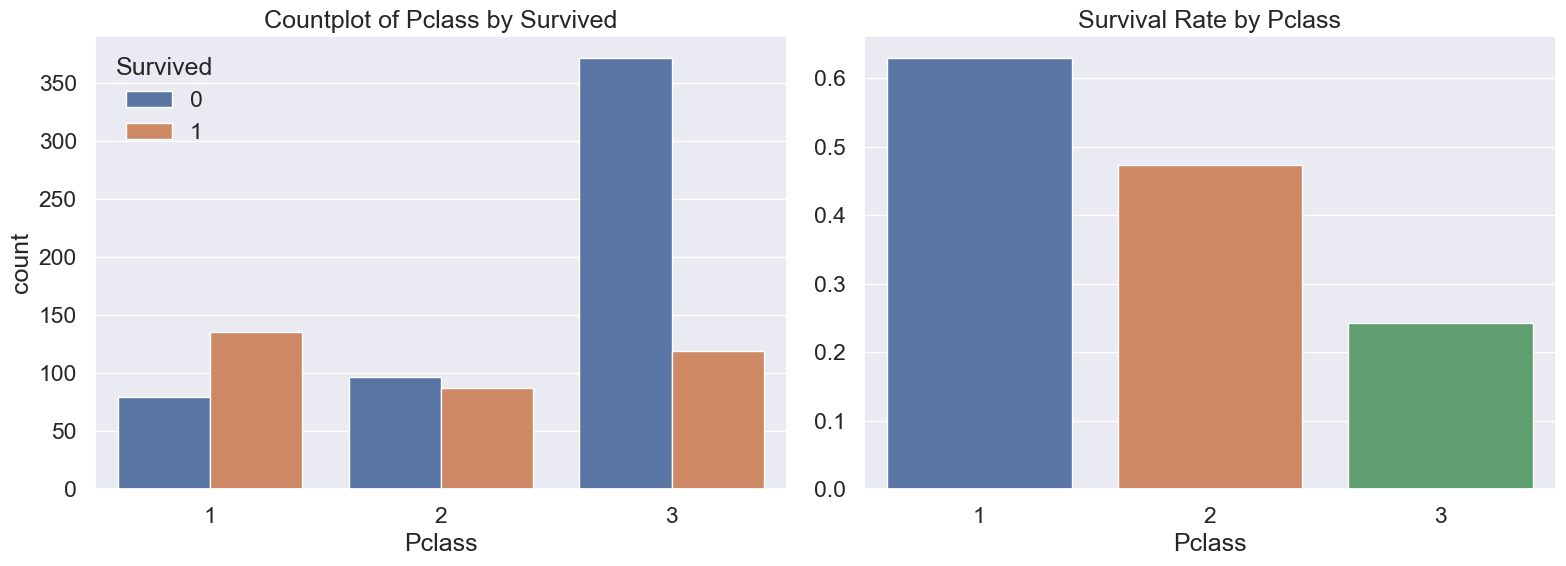

In [11]:
# Pclass 생존율 계산
survival_rate = data.groupby('Pclass')['Survived'].mean()

# 그래프 크기 설정
plt.figure(figsize=(16, 6))

# 첫 번째 subplot: countplot / Pclass별 Survived
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Countplot of Pclass by Survived')

# 두 번째 subplot: barplot / Pclass별 생존율
plt.subplot(1, 2, 2)
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Pclass')

# 그래프 출력
plt.tight_layout()
plt.show()

## Sex

In [12]:
# Sex별 생존자 Survived
pd.crosstab(data['Sex'], data['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [13]:
# Sex별 생존율
data.groupby('Sex')['Survived'].mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


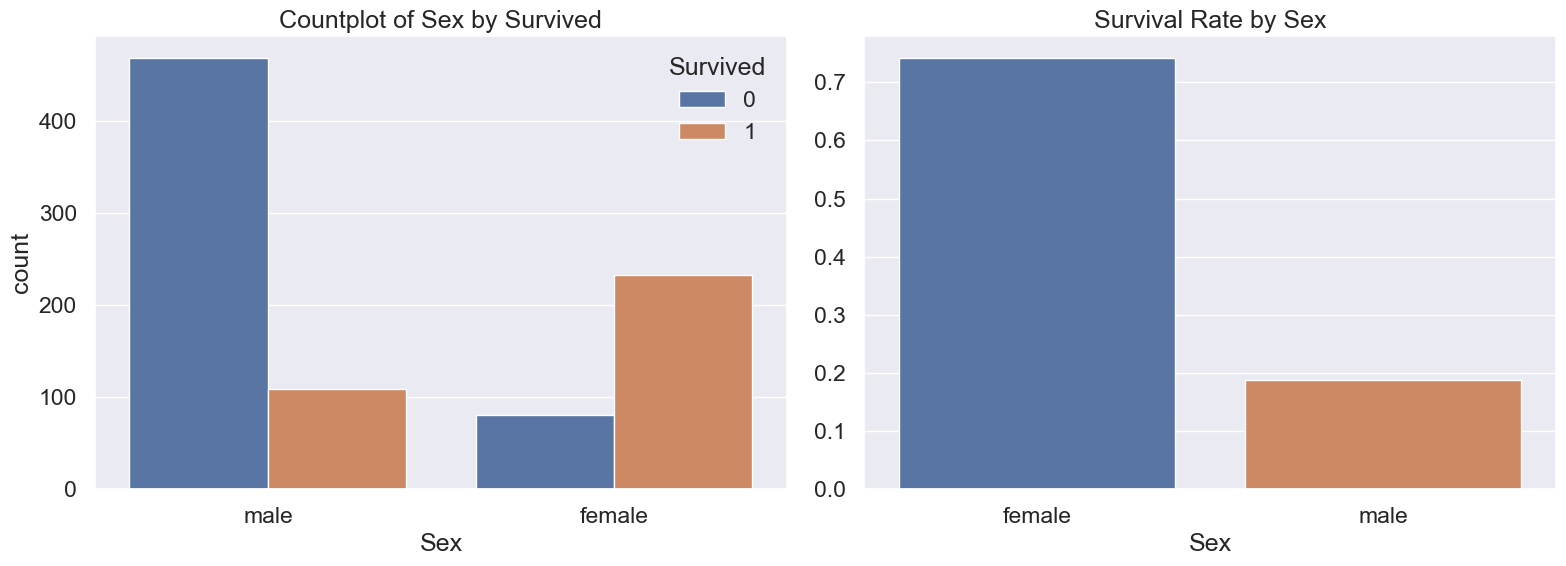

In [14]:
# sex별 생존율 계산
survival_rate = data.groupby('Sex')['Survived'].mean()

# 그래프 크기 설정
plt.figure(figsize=(16,6))

# 첫 번째 subplot: countplot / Sex별 Survived
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Countplot of Sex by Survived')

# 두 번째 subplot: barplot / Sex별 생존율
plt.subplot(1, 2, 2)
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Sex')

# 그래프 출력
plt.tight_layout()
plt.show()

## Age

In [15]:
# Age열 기술통계
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Age를 10으로 나누어 10대 20대 30대 ~ 구분
data['Age_Group'] = data['Age'] // 10 * 10

# Age Group별 Survived
pd.crosstab(data['Age_Group'], data['Survived'], margins=True)

Survived,0,1,All
Age_Group,,,
0.0,24,38,62
10.0,61,41,102
20.0,143,77,220
30.0,94,73,167
40.0,55,34,89
50.0,28,20,48
60.0,13,6,19
70.0,6,0,6
80.0,0,1,1


In [17]:
# Age_Group별 생존율
data.groupby('Age_Group')['Survived'].mean().reset_index()

,Age_Group,Survived
0,0.0,0.612903
1,10.0,0.401961
2,20.0,0.350000
3,30.0,0.437126
4,40.0,0.382022
5,50.0,0.416667
6,60.0,0.315789
7,70.0,0.000000
8,80.0,1.000000


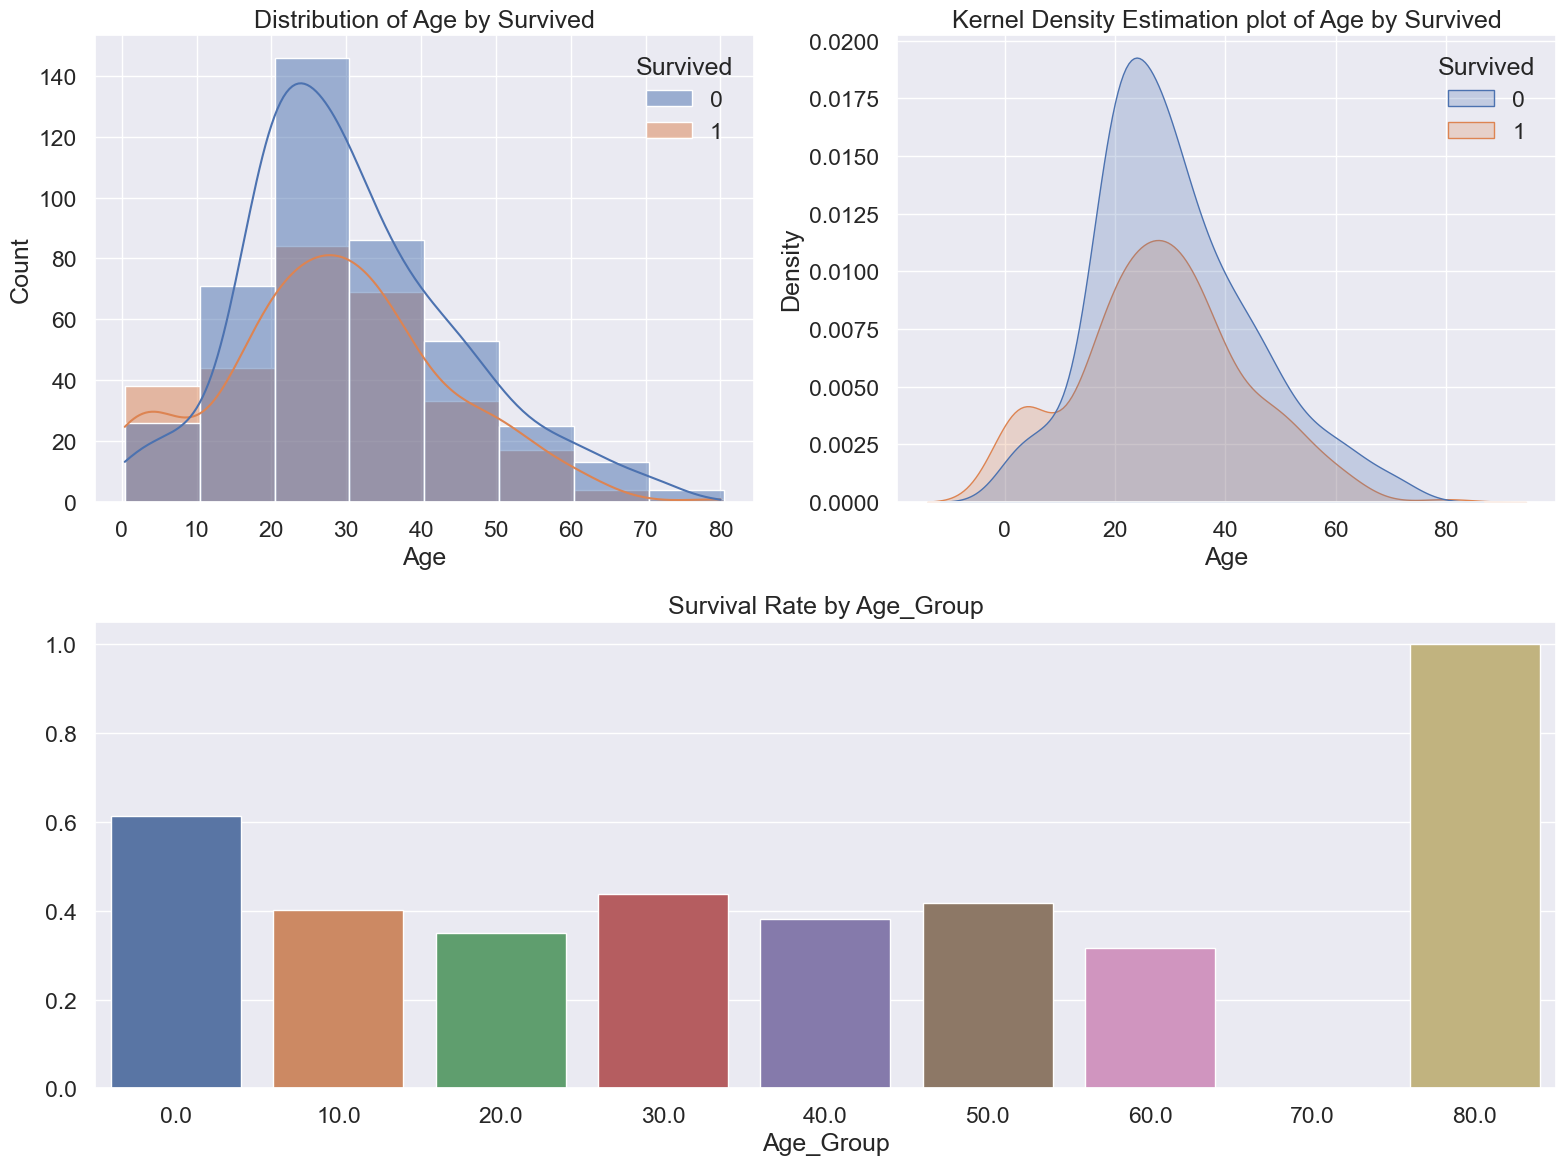

In [18]:
# Age_Group별 생존율 계산
survival_rate = data.groupby('Age_Group')['Survived'].mean()

# 그래프 크기 설정
plt.figure(figsize=(16,12))

# 첫 번째 subplot: histplot / Age별 Survived
plt.subplot(2, 2, 1)
sns.histplot(x='Age', hue='Survived', data=data, binwidth=10, kde=True, alpha=0.5)
plt.title('Distribution of Age by Survived')

# 두 번째 subplot: kdeplot
plt.subplot(2, 2, 2)
sns.kdeplot(x='Age', hue='Survived', data=data, fill=True)
plt.title('Kernel Density Estimation plot of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Density')

# 세 번째 subplot: barplot / Age_Group별 생존율
plt.subplot(2, 2, (3,4))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Age_Group')

# 그래프 출력
plt.tight_layout()
plt.show()

## Fare

In [19]:
# Fare 기술통계
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

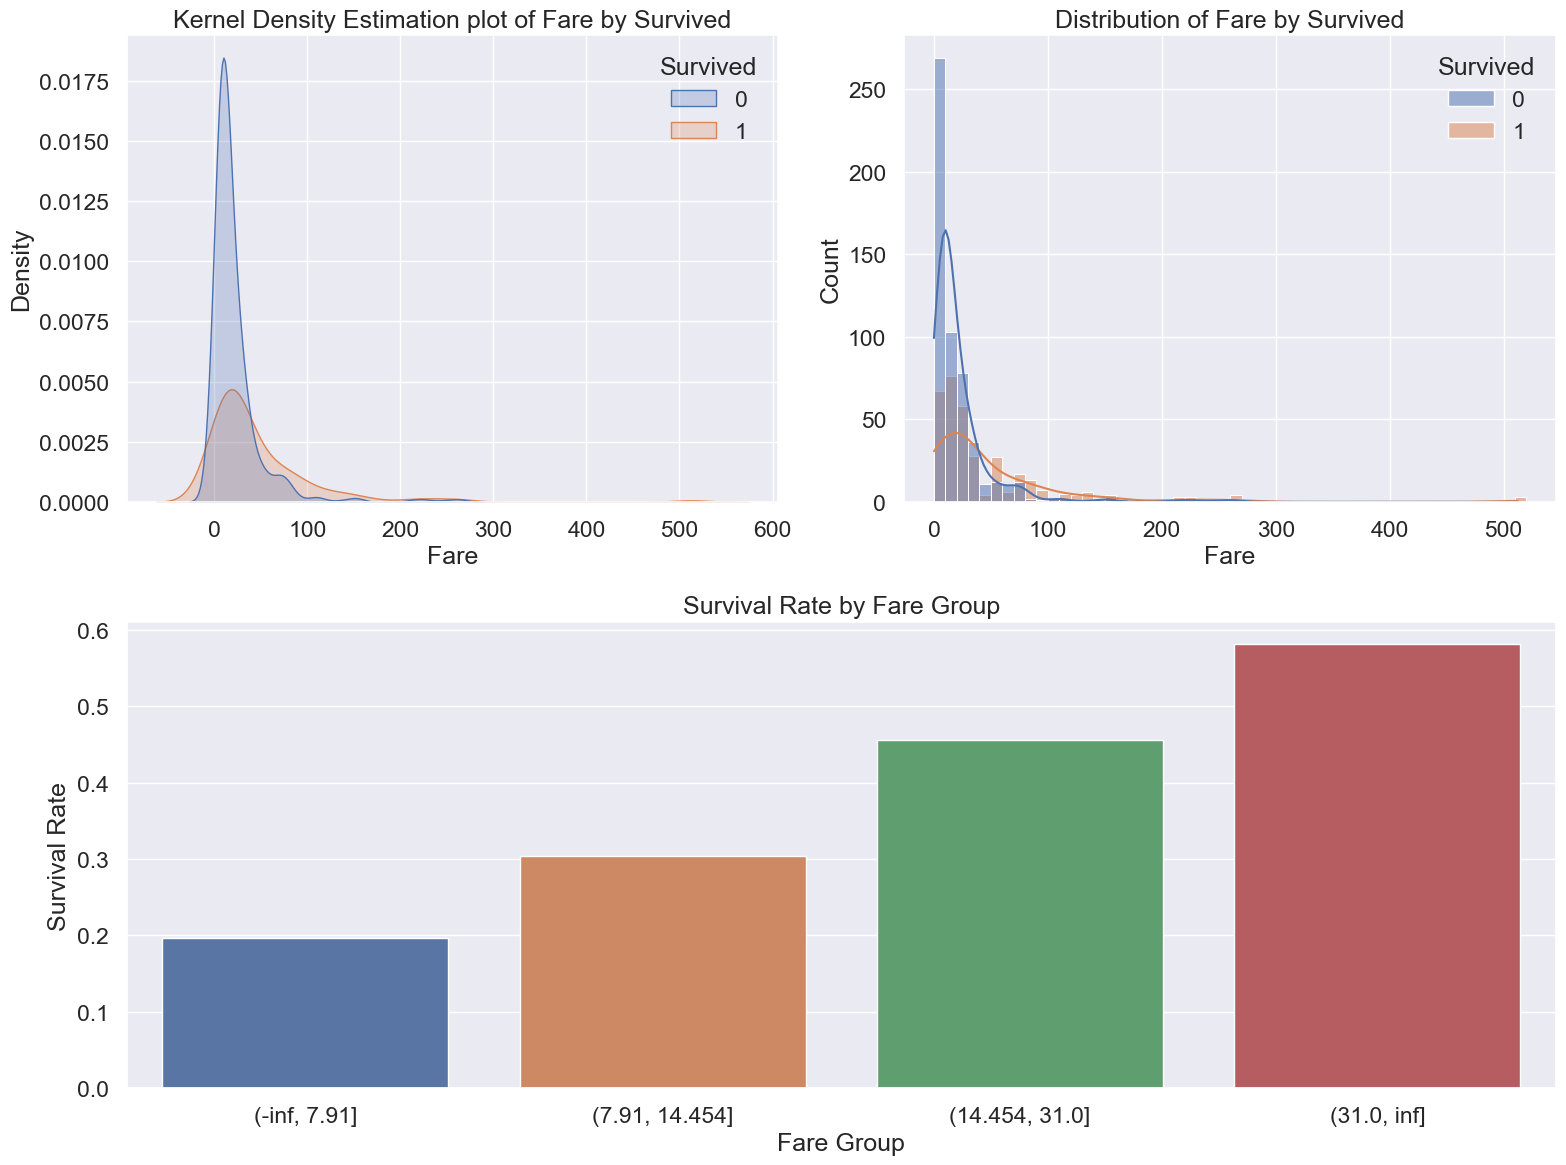

In [20]:
# 4분위수로 bins 설정
fare_describe = data['Fare'].describe()
bins = [-np.inf, fare_describe['25%'], fare_describe['50%'], fare_describe['75%'], np.inf]

# Fare 구간별 생존율 구하기
Fare_bins = pd.cut(data['Fare'], bins=bins)
survival_rate = data.groupby(Fare_bins)['Survived'].mean()

# 그래프 크기 설정
plt.figure(figsize=(16,12))

# 첫 번째 그래프: kdeplot / Fare별 Survived
plt.subplot(2, 2, 1)
sns.kdeplot(x='Fare', hue='Survived', data=data, fill=True)
plt.title('Kernel Density Estimation plot of Fare by Survived')
plt.xlabel('Fare')
plt.ylabel('Density')

# 두 번째 그래프: histplot / Fare별 Survived
plt.subplot(2, 2, 2)
sns.histplot(x='Fare', hue='Survived', data=data, binwidth=10, kde=True, alpha=0.5)
plt.title('Distribution of Fare by Survived')

# 세 번째 그래프: countplot / Fare_Group별 생존율
plt.subplot(2, 2, (3,4))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()

## SibSp + Parch (Family)

In [21]:
# Sibsp와 Parch를 활용하여 탑승 가족 인원 수 계산
data['Family'] = data['SibSp'] + data['Parch'] + 1

In [22]:
# Family별 생존자 수
pd.crosstab(data['Family'], data['Survived'], margins=True)

Survived,0,1,All
Family,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


In [23]:
# Family별 생존율
data.groupby('Family')['Survived'].mean().reset_index()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


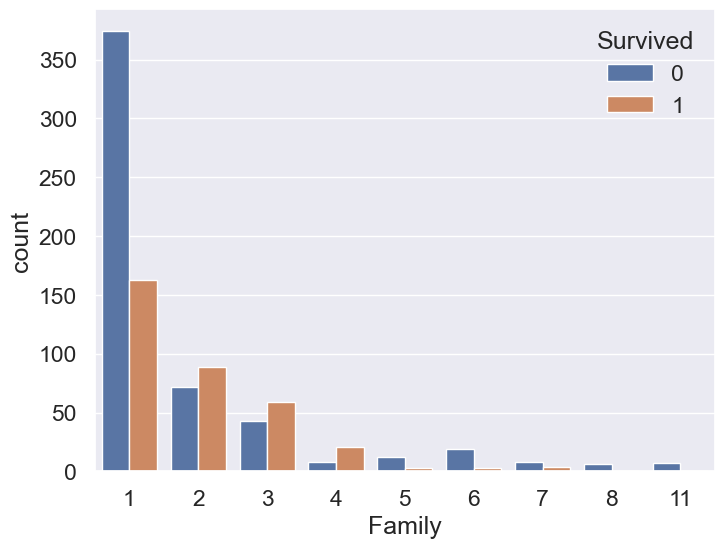

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family', hue='Survived', data=data)
plt.show()

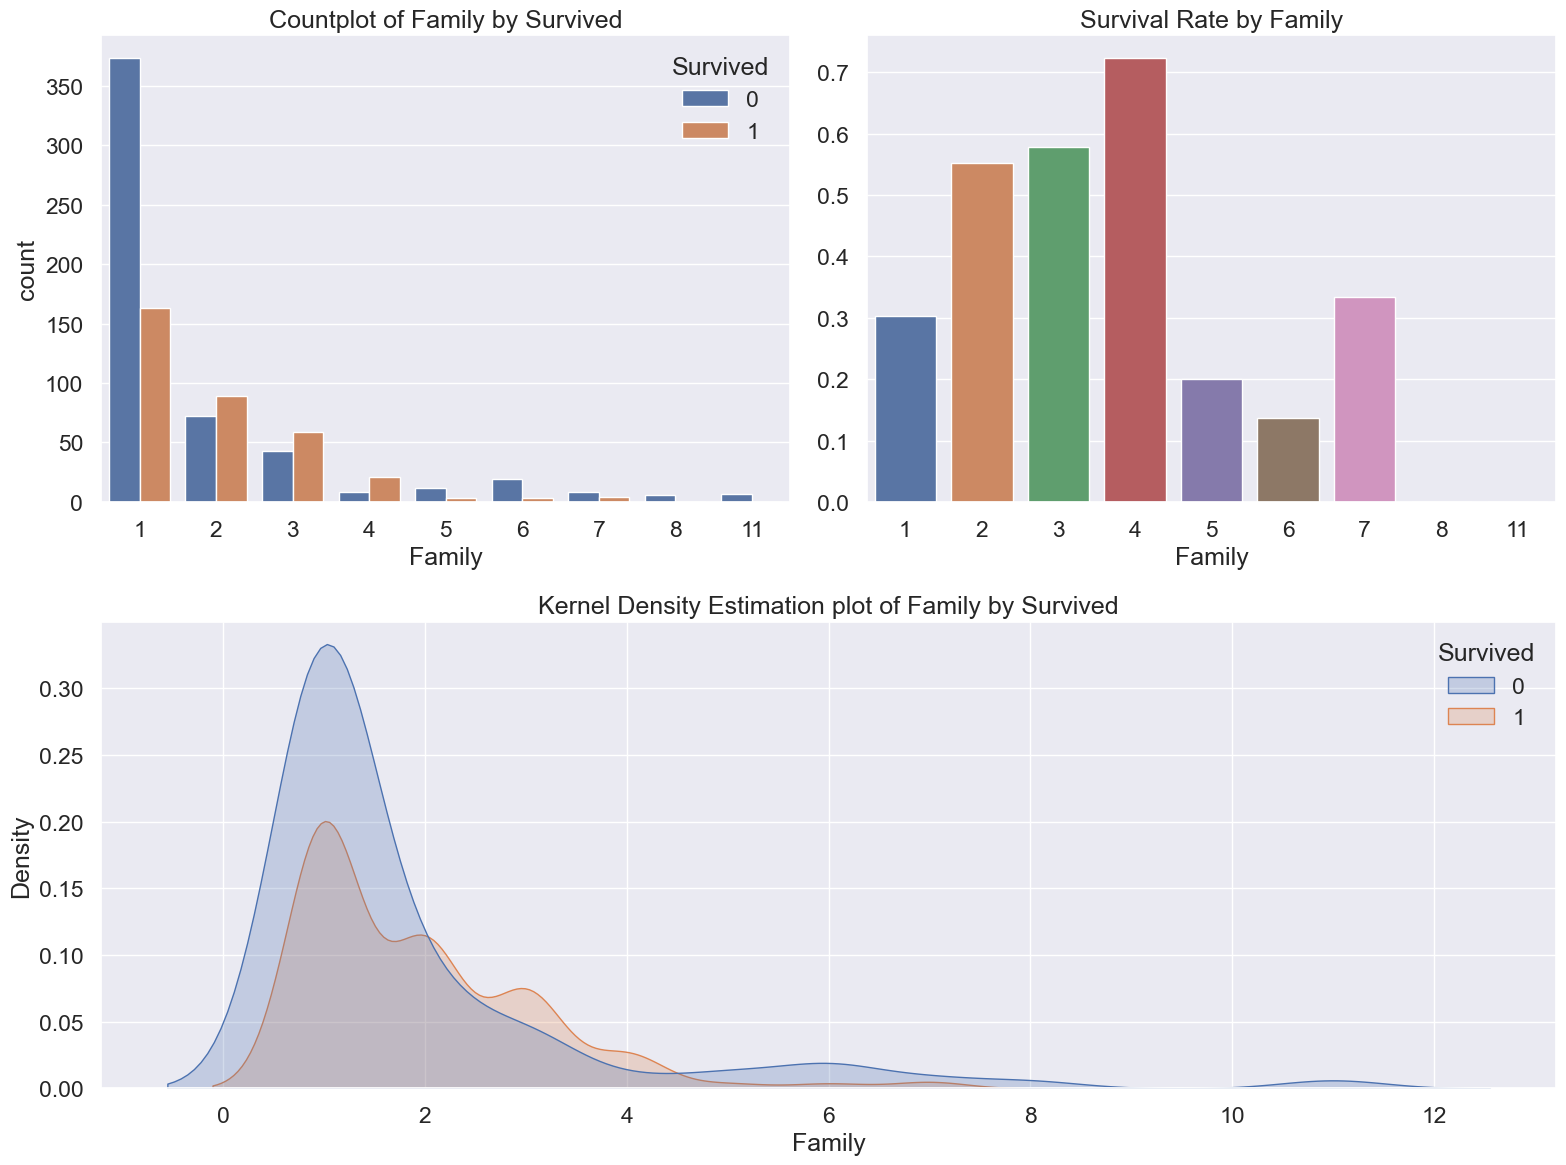

In [25]:
# Family별 생존율 계산
survival_rate = data.groupby('Family')['Survived'].mean()

# 그래프 크기 설정
plt.figure(figsize=(16,12))

# 첫 번째 subplot: countplot / Family별 Survived
plt.subplot(2,2,1)
sns.countplot(x='Family', hue='Survived', data=data)
plt.title('Countplot of Family by Survived')

# 두 번째 subplot: barplot / Family별 생존율
plt.subplot(2,2,2)
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Family')

# 세 번째 subplot: kdeplot
plt.subplot(2, 2, (3,4))
sns.kdeplot(x='Family', hue='Survived', data=data, fill=True)
plt.title('Kernel Density Estimation plot of Family by Survived')

plt.tight_layout()
plt.show()

## Embarked

In [26]:
# Embarked별 Survived
pd.crosstab(data['Embarked'], data['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [27]:
# Embarked별 생존율
data.groupby('Embarked')['Survived'].mean().reset_index()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


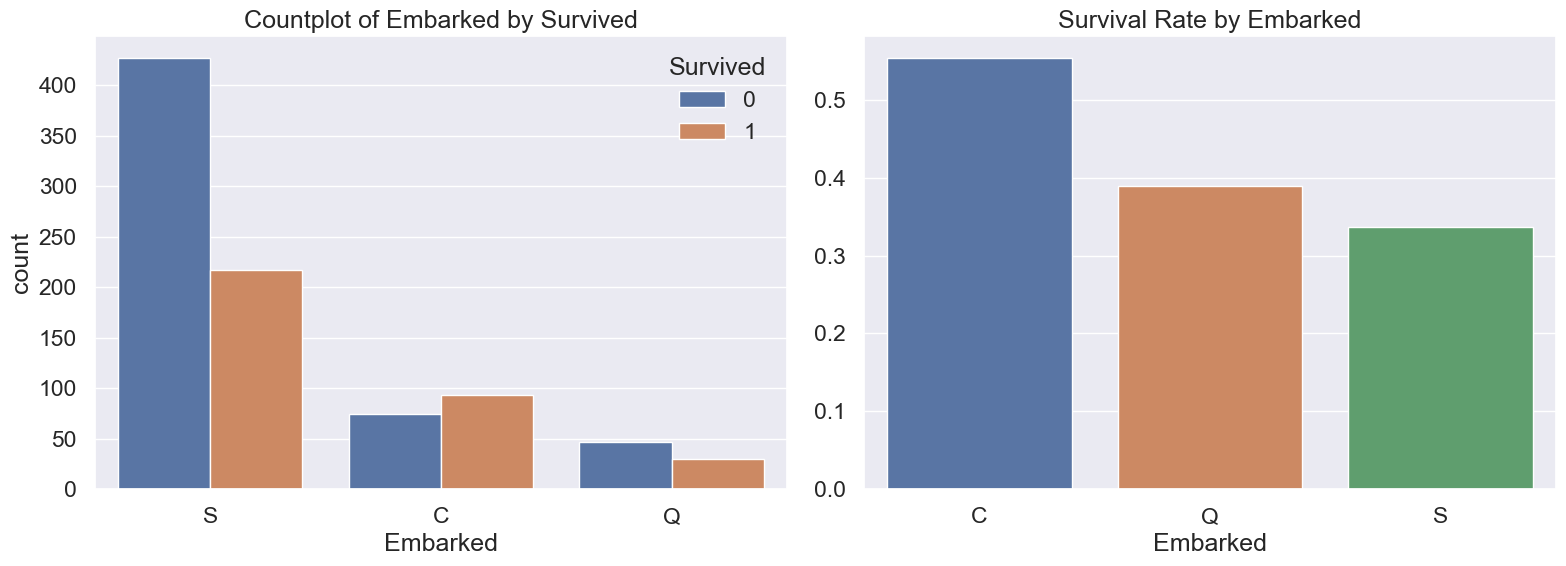

In [28]:
# Embarked별 생존율 계산
survival_rate = data.groupby('Embarked')['Survived'].mean()

# 그래프 크기 지정
plt.figure(figsize=(16,6))

# 첫 번째 그래프: countplot / Embarked별 생존자
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Countplot of Embarked by Survived')

# 두 번째 그래프: barplot / Embarked별 생존율
plt.subplot(1, 2, 2)
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()

## Embarked & Pclass

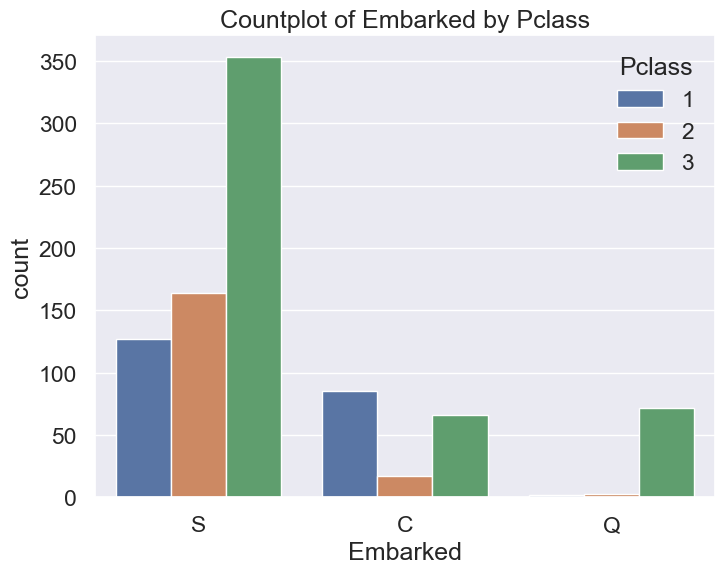

In [29]:
# Pclass별 Embarked
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Pclass', data=data)
plt.title('Countplot of Embarked by Pclass')
plt.show()

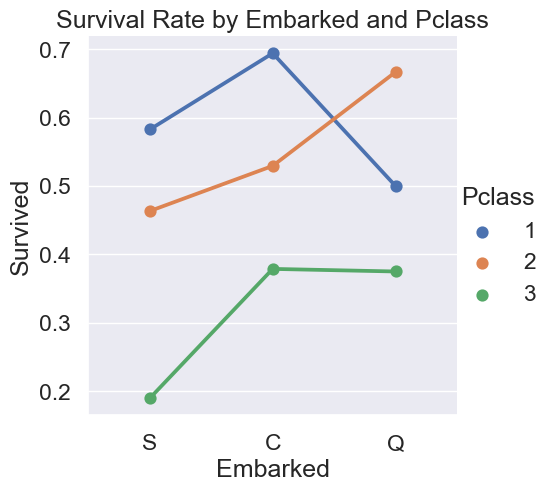

In [30]:
# Embarked, Pclass와 Survived 관계 시각화
sns.catplot(x='Embarked', y='Survived', hue='Pclass', kind='point', errorbar=None, data=data)
plt.title('Survival Rate by Embarked and Pclass')
plt.show()

## Embarked & Sex

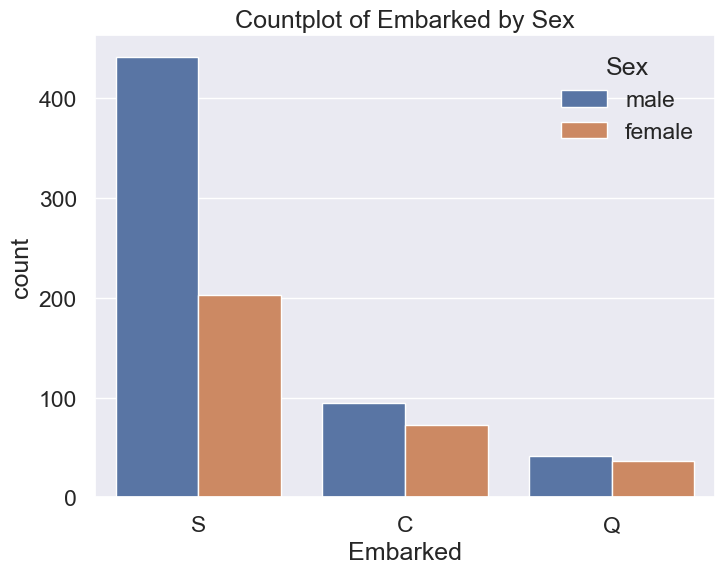

In [31]:
# Sex별 Embarked
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', hue='Sex', data=data)
plt.title('Countplot of Embarked by Sex')
plt.show()

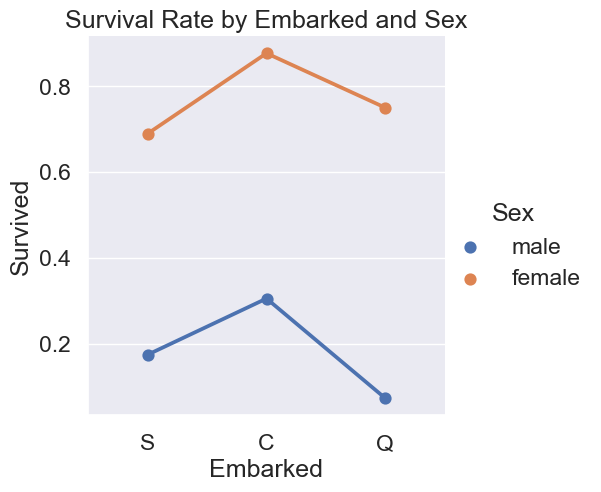

In [32]:
# Embarked, Sex와 Survived 관계 시각화
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='point', errorbar=None, data=data)
plt.title("Survival Rate by Embarked and Sex")
plt.show()

## Embarked & Age

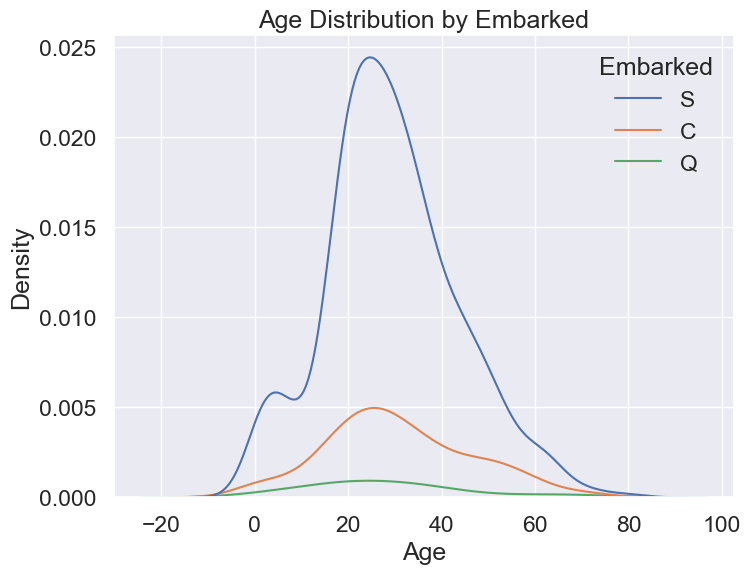

In [33]:
# Embarked별 Age 분포 시각화
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age', hue='Embarked', data=data)
plt.title('Age Distribution by Embarked')
plt.show()

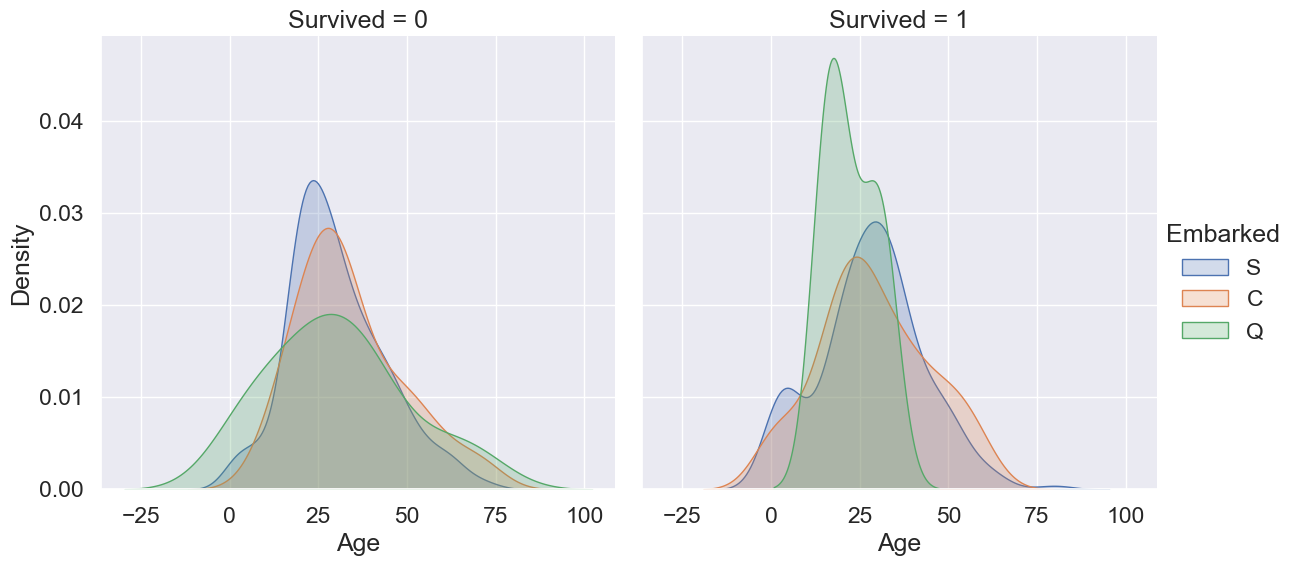

In [34]:
# Embarked, Age와 Survived 관계 시각화 
grid = sns.FacetGrid(data, hue='Embarked', col='Survived', height=6)
grid.map(sns.kdeplot, 'Age', fill=True)
grid.add_legend()
plt.show()

## Embarked & Fare

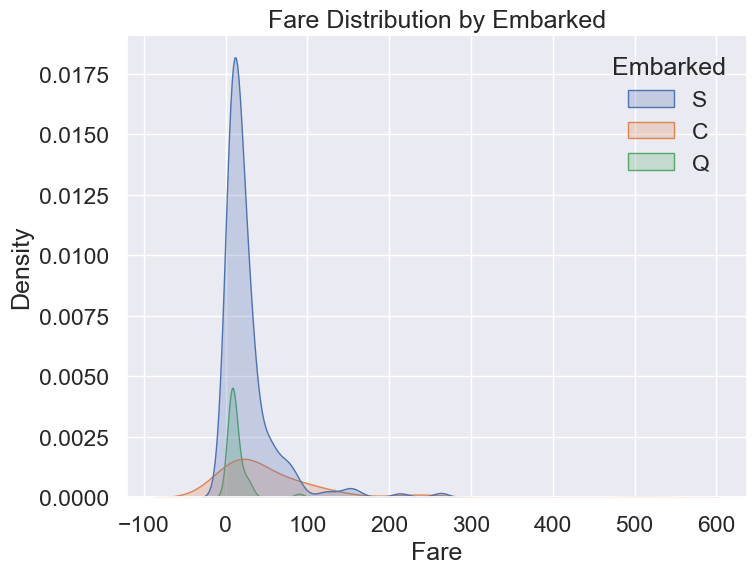

In [35]:
# Embarked별 Fare 분포 시각화
plt.figure(figsize=(8,6))
sns.kdeplot(x='Fare', hue='Embarked', data=data, fill=True)
plt.title('Fare Distribution by Embarked')
plt.show()

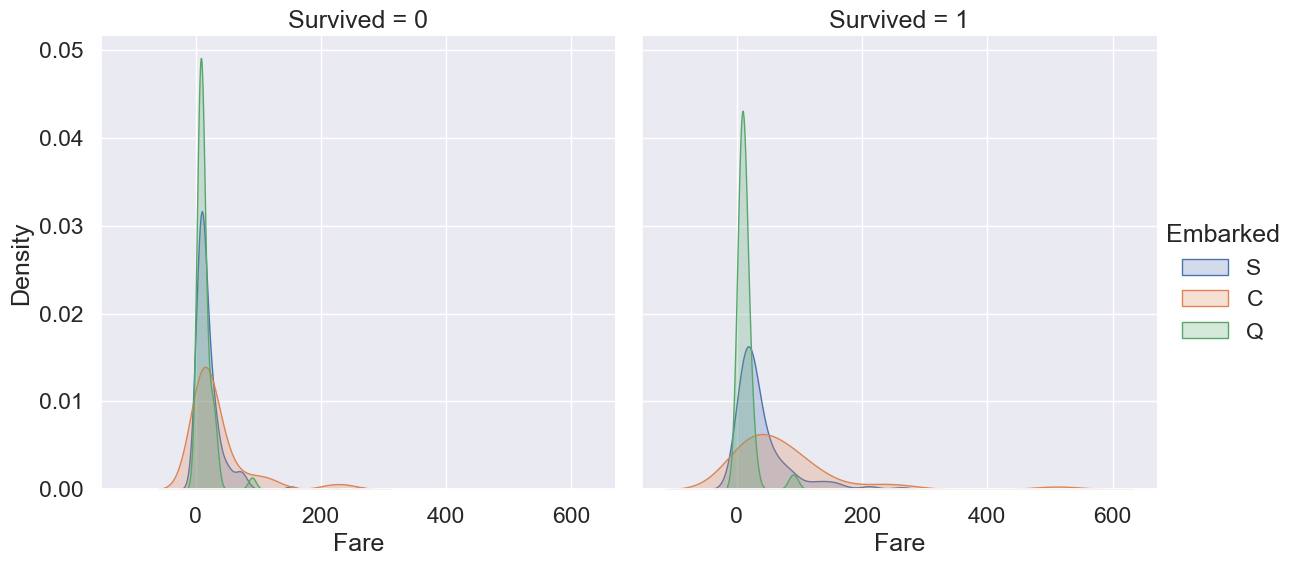

In [36]:
# Embarked, Fare와 Survived 관계 시각화
grid = sns.FacetGrid(data, hue='Embarked', col='Survived', height=6)
grid.map(sns.kdeplot, 'Fare', fill=True)
grid.add_legend()
plt.show()

## Pclass & Sex

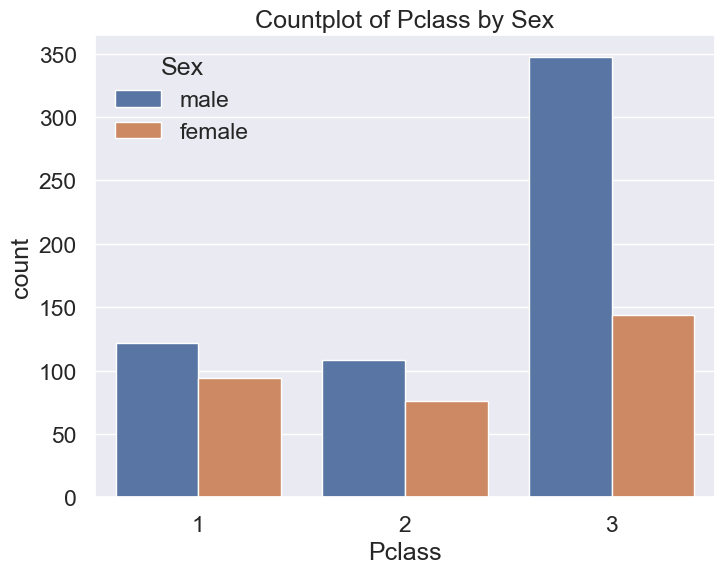

In [37]:
# Sex별 Pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Sex', data=data)
plt.title('Countplot of Pclass by Sex')
plt.show()

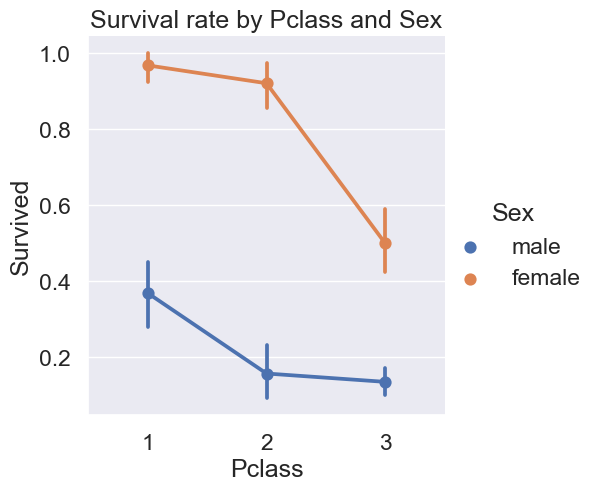

In [38]:
# Pclass, Sex와 Survived 관계 시각화
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=data)
plt.title('Survival rate by Pclass and Sex')
plt.show()

## Pclass & Age

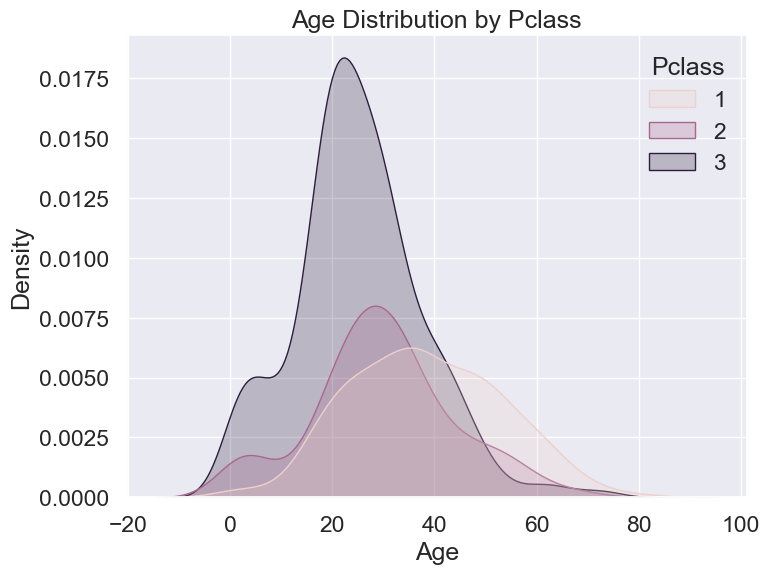

In [39]:
# Pclass별 Age 분포
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age', hue='Pclass', data=data, fill=True)
plt.title('Age Distribution by Pclass')
plt.show()

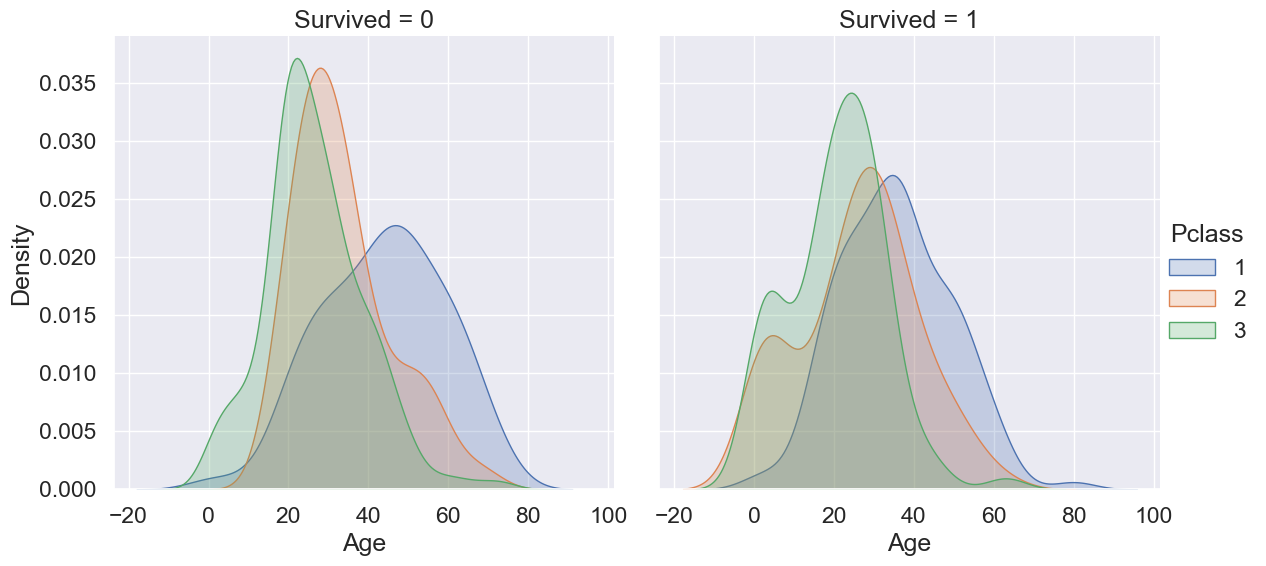

In [40]:
# Pclass, Age와 Survived 관계 시각화
grid = sns.FacetGrid(data, hue='Pclass', col='Survived', height=6)
grid.map(sns.kdeplot, 'Age', fill=True)
grid.add_legend()
plt.show()

## Pclass & Fare

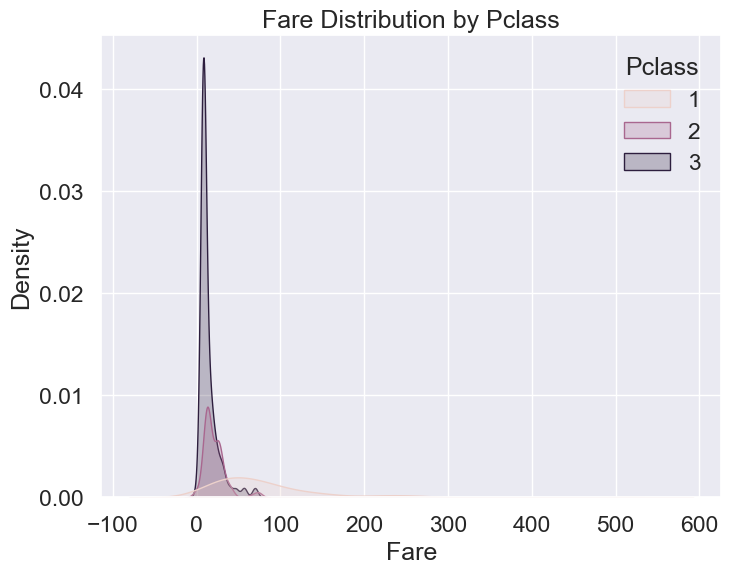

In [41]:
# Pclass별 Fare 분포 시각화
plt.figure(figsize=(8,6))
sns.kdeplot(x='Fare', hue='Pclass', data=data, fill=True)
plt.title('Fare Distribution by Pclass')
plt.show()

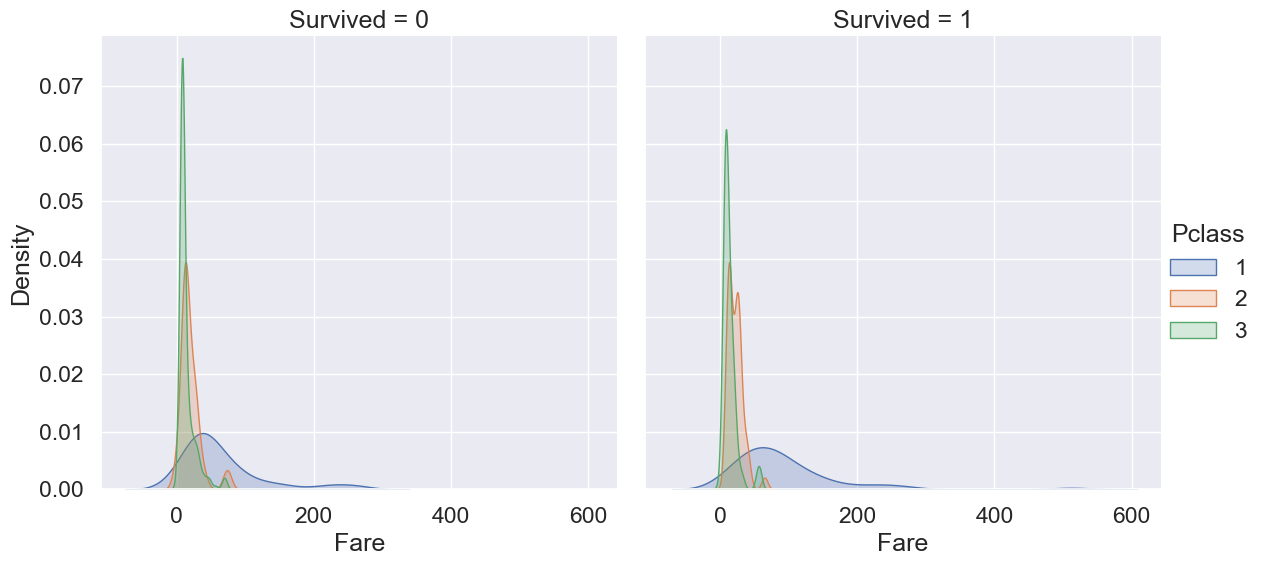

In [42]:
# Pclass, Fare와 Survived 관계 시각화
grid = sns.FacetGrid(data, hue='Pclass', col='Survived', height=6)
grid.map(sns.kdeplot, 'Fare', fill=True)
grid.add_legend()
plt.show()

## Sex & Age

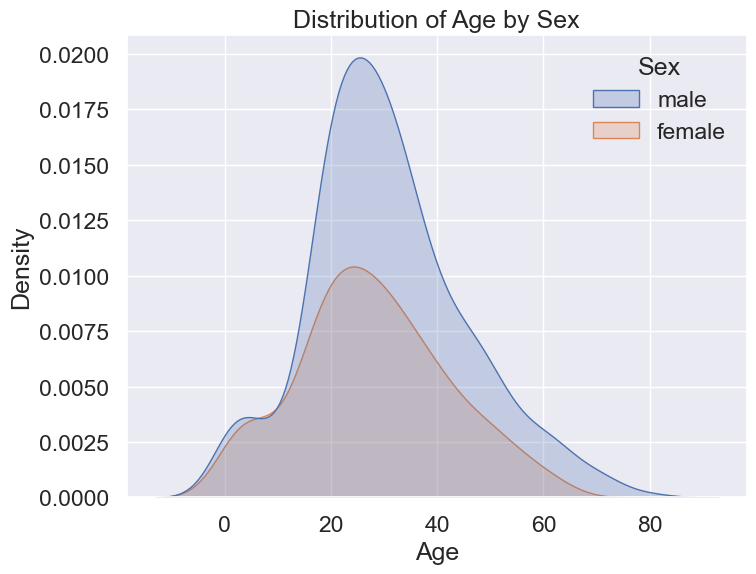

In [43]:
# Sex별 Age 분포 시각화
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age', hue='Sex', data=data, fill=True)
plt.title('Distribution of Age by Sex')
plt.show()

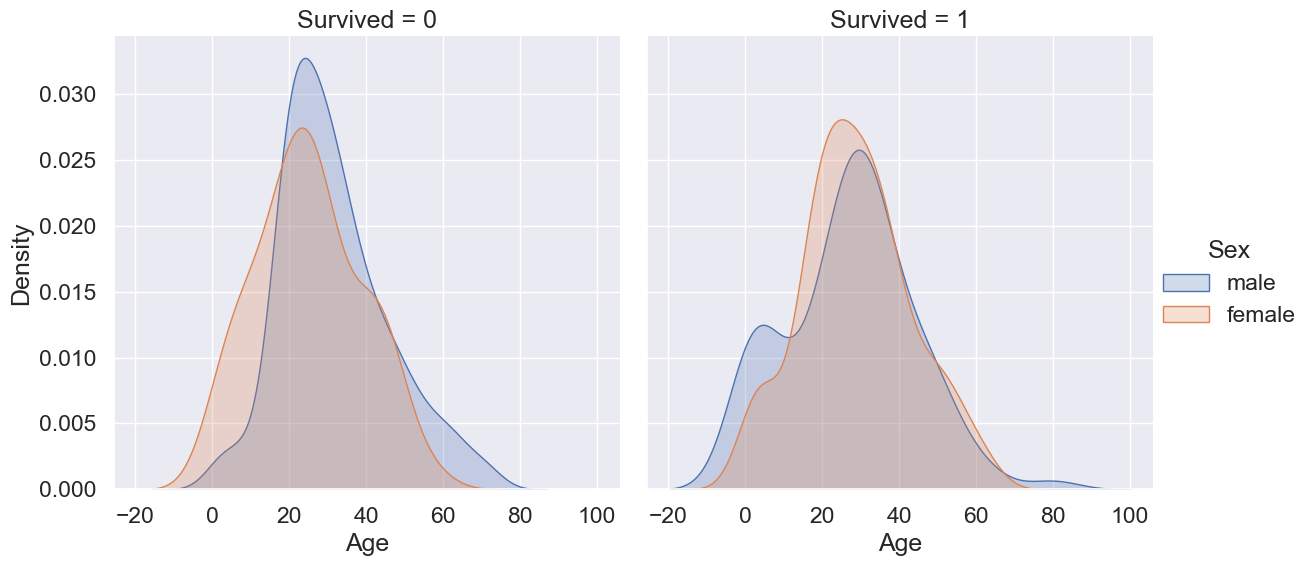

In [44]:
# Sex, Age와 Survived 관계 시각화
grid = sns.FacetGrid(data, hue='Sex', col='Survived', height=6)
grid.map(sns.kdeplot, 'Age', fill=True)
grid.add_legend()
plt.show()

## Sex & Fare

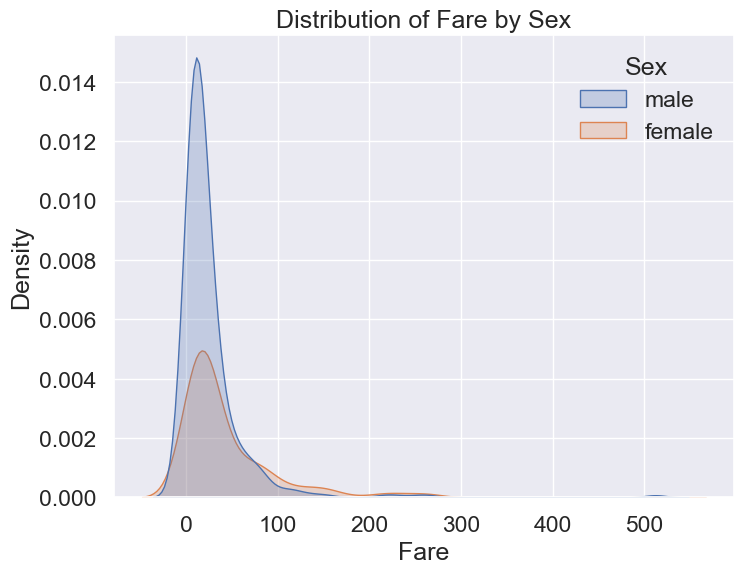

In [45]:
# Sex별 Fare 분포 시각화
plt.figure(figsize=(8,6))
sns.kdeplot(x='Fare', hue='Sex', data=data, fill=True)
plt.title('Distribution of Fare by Sex')
plt.show()

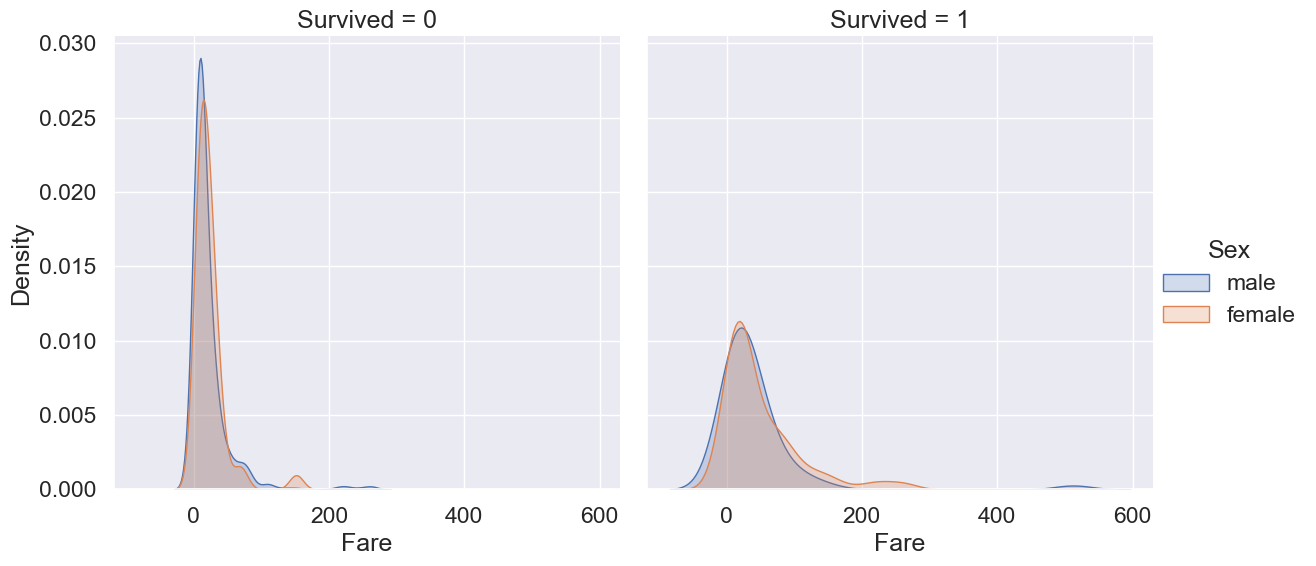

In [46]:
# Sex, Fare와 Survived 관계 시각화
grid = sns.FacetGrid(data, hue='Sex', col='Survived', height=6)
grid.map(sns.kdeplot, 'Fare', fill=True)
grid.add_legend()
plt.show()

# 4. Data Preprocessing

## Fill NaN

In [47]:
data['Initial'] = data['Name'].str.extract(r'([A-Za-z]+)\.')
pd.crosstab(data['Initial'], data['Sex'], margins=True)

Sex,female,male,All
Initial,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


In [48]:
# 대체할 값들을 포함한 딕셔너리 생성
replace_dict = {
    'Mlle': 'Miss',
    'Mme': 'Miss',
    'Ms': 'Miss',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Lady': 'Mrs',
    'Countess': 'Mrs',
    'Jonkheer': 'Other',
    'Col': 'Other',
    'Rev': 'Other',
    'Capt': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Dona': 'Mr'
}

# 딕셔너리를 사용하여 값 대체
data['Initial'] = data['Initial'].replace(replace_dict)

In [49]:
data['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [50]:
# Initial별 생존율 
data.groupby('Initial')['Survived'].mean().reset_index()

,Initial,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.162571
3,Mrs,0.795276
4,Other,0.111111


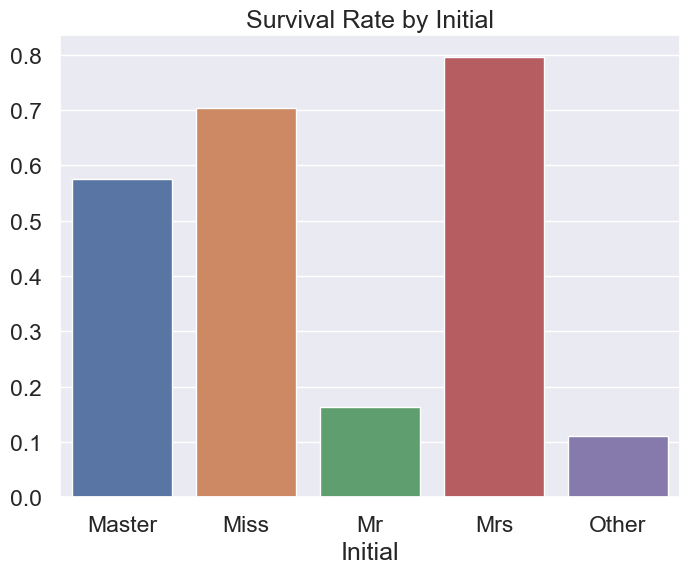

In [51]:
# Initial별 생존율 계산
survival_rate = data.groupby('Initial')['Survived'].mean()

# Initial별 생존율 시각화
plt.figure(figsize=(8,6))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('Survival Rate by Initial')
plt.show()

In [52]:
# Initial별 Age 평균 구하기
initial_means = data.groupby('Initial')['Age'].mean()

In [53]:
# NaN을 각 Initial 평균으로 채우기
data['Age'].fillna(data['Initial'].map(initial_means), inplace=True)

In [54]:
# NaN 개수
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Group      177
Family           0
Initial          0
dtype: int64

In [55]:
# Embarked에 최빈값 넣기
embarked_mode = data['Embarked'].mode()[0]
data['Embarked'].fillna(embarked_mode, inplace=True)

In [56]:
# NaN 개수
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_Group      177
Family           0
Initial          0
dtype: int64

## Drop Columns

In [57]:
data.drop(columns=['PassengerId', 'Name', 'SibSp','Parch','Ticket','Cabin','Age_Group','Initial']).head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [58]:
data.drop(columns=['PassengerId', 'Name', 'SibSp','Parch','Ticket','Cabin','Age_Group','Initial'], inplace=True)

## One Hot Encoding

In [59]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [60]:
# 대상: Pclass, Sex, Embarked
dumm_cols = ['Pclass', 'Sex', 'Embarked']

# One Hot Encoding
x = pd.get_dummies(x, columns=dumm_cols)

# 확인
x.head()

,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,0,0,1,0,1,0,0,1
1,38.0,71.2833,2,1,0,0,1,0,1,0,0
2,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,35.0,53.1000,2,1,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,1,0,1,0,0,1


## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [62]:
x_train.shape, x_test.shape

((623, 11), (268, 11))

In [63]:
y_train.shape, y_test.shape

((623,), (268,))

# Modeling

## Logistic Regression

In [64]:
# 모델 선언, 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [65]:
# 예측하기
y_pred = model.predict(x_test)

In [66]:
# 평가하기
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.13764822832455248
R-squared (R2): 0.4326937309242751


In [67]:
# 회귀계수 확인
coefficients_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model.coef_})

print("회귀계수:")
print(coefficients_df)
print("편향: ", model.intercept_)

회귀계수:
       Feature  Coefficient
0          Age    -0.004857
1         Fare     0.000614
2       Family    -0.030626
3     Pclass_1     0.108160
4     Pclass_2     0.051294
5     Pclass_3    -0.159454
6   Sex_female     0.246285
7     Sex_male    -0.246285
8   Embarked_C     0.049101
9   Embarked_Q     0.010539
10  Embarked_S    -0.059640
편향:  0.7216045107306973


In [68]:
# y_pred를 이진 클래스로 변환
y_pred_binary = (y_pred > 0.5).astype(int)
logistic_acc = accuracy_score(y_test, y_pred_binary)

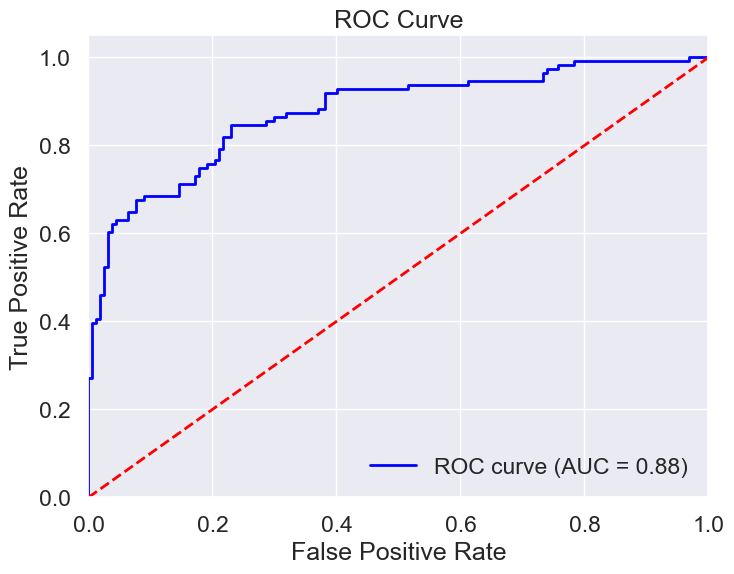

In [69]:
# ROC 곡선을 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## RandomForest Classifier

In [70]:
# 모델 선언, 학습
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
# 예측
y_pred = model.predict(x_test)

In [72]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# 정밀도 출력
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 재현율 출력
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 점수 출력
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[128  29]
 [ 27  84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       157
           1       0.74      0.76      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268


Accuracy: 0.7910447761194029
Precision: 0.7433628318584071
Recall: 0.7567567567567568
F1 Score: 0.7500000000000001


In [73]:
randomforest_acc = accuracy_score(y_test, y_pred)

ROC AUC Score: 0.7860216904802892


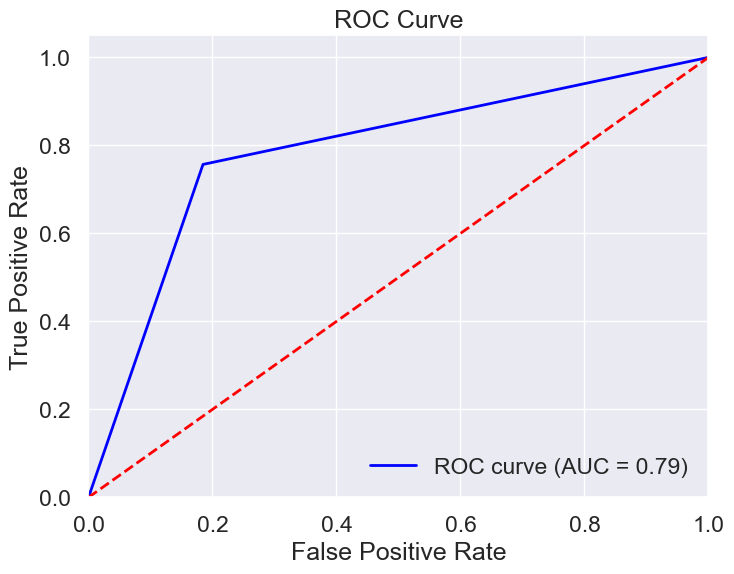

In [74]:
# ROC AUC 점수 계산 및 출력
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [75]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=x_test.columns)

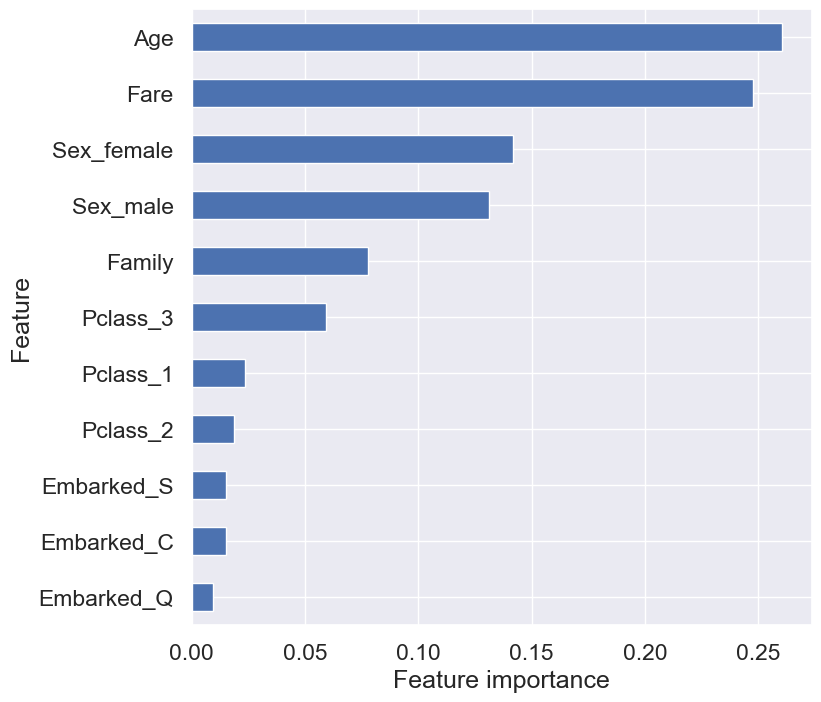

In [76]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## SupportVector Classifier

In [77]:
# 모델 선언, 학습
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [78]:
# 예측
y_pred = model.predict(x_test)

In [79]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# 정밀도 출력
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 재현율 출력
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 점수 출력
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[147  10]
 [ 82  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.74      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.69      0.60      0.57       268
weighted avg       0.68      0.66      0.61       268


Accuracy: 0.6567164179104478
Precision: 0.7435897435897436
Recall: 0.26126126126126126
F1 Score: 0.38666666666666666


ROC AUC Score: 0.5987834968726689


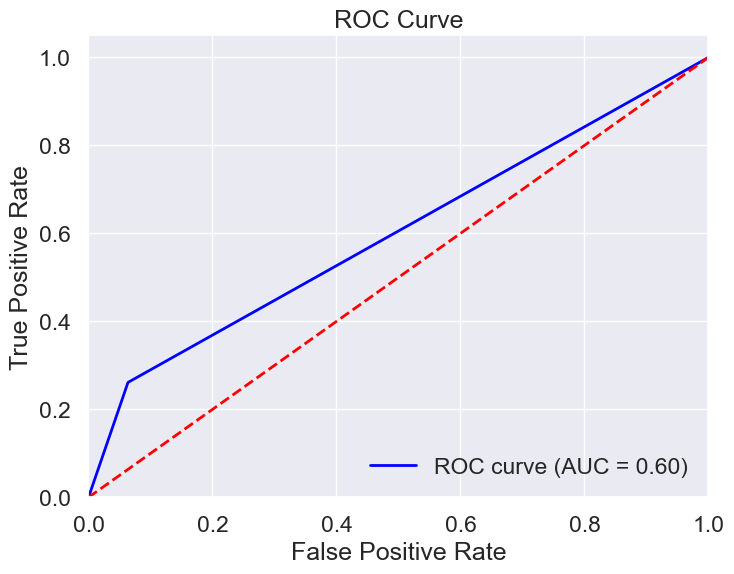

In [80]:
# ROC AUC 점수 계산 및 출력
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
svc_acc = accuracy_score(y_test, y_pred)

## KNeighbors Classifier

In [82]:
# 모델 선언, 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
# 예측
y_pred = model.predict(x_test)

In [84]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# 정밀도 출력
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 재현율 출력
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 점수 출력
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[132  25]
 [ 34  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268


Accuracy: 0.7798507462686567
Precision: 0.7549019607843137
Recall: 0.6936936936936937
F1 Score: 0.7230046948356808


ROC AUC Score: 0.7672290124519425


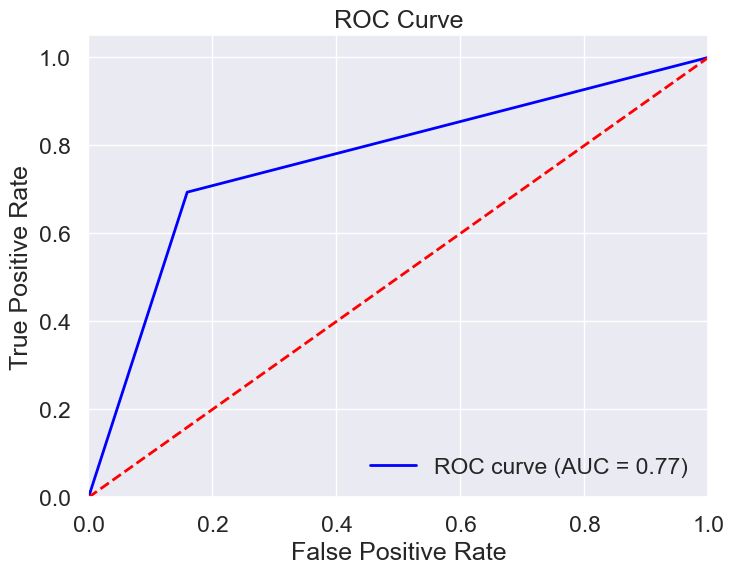

In [85]:
# ROC AUC 점수 계산 및 출력
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [86]:
knn_acc = accuracy_score(y_test, y_pred)

# 5. Model Evaluation

In [87]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'RandomForest Classifier', 
             'SupportVector Classifier', 'KNeighbors Classifier'],
    'Score': [logistic_acc, randomforest_acc, svc_acc, knn_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,RandomForest Classifier,0.791045
0,Logistic Regression,0.783582
3,KNeighbors Classifier,0.779851
2,SupportVector Classifier,0.656716
